<a href="https://colab.research.google.com/github/pinoke98/Artificial_Intelligence/blob/main/ML_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Algoritmos de clasificacion Python

Scikit-learn es el paquete mas conocido de Python para algotimos de machine learning. 
Este tiene incluida algunas bases de datos para probar los algoritmos. 
Las bases incluidas en este paquete son objetos tipo diccionario

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [ ]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


###Arbol de decision


In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf_ig = tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
clf = clf.fit(X,y)
clf_ig = clf_ig.fit(X,y)

In [ ]:
import graphviz

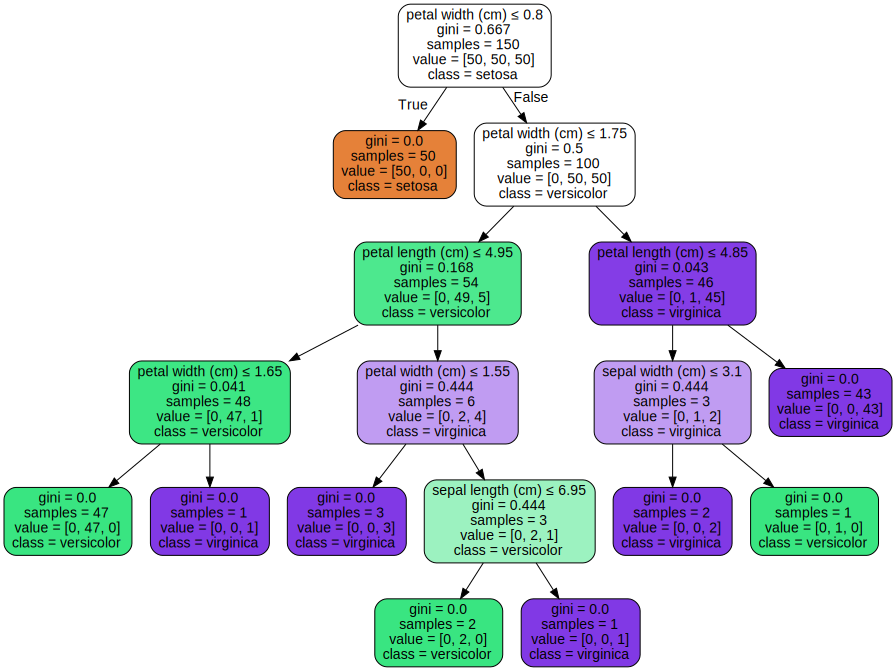

In [ ]:
dot_data = tree.export_graphviz(clf,out_file=None,
                                feature_names=iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
DT = graphviz.Source(dot_data)
DT

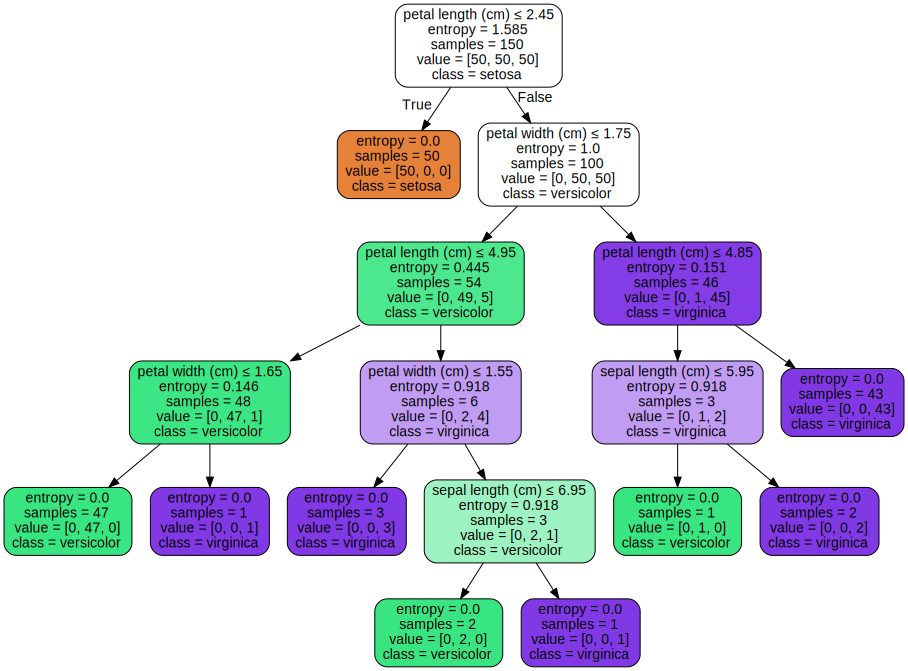

In [ ]:
dot_data = tree.export_graphviz(clf_ig,out_file=None,
                                feature_names=iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
DT = graphviz.Source(dot_data)
DT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify = y)

In [ ]:
print(len(X_train))
print(len(X_test))

120
30


In [ ]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([40, 40, 40]))
(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([10, 10, 10]))


In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction = clf.predict(X_test)
prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [ ]:
prediction_prob = clf.predict_proba(X_test)
prediction_prob

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
clf.score(X_test,y_test)

0.9333333333333333

###KNN

In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:-1].astype(float)
y = dataset[:,-1]

In [ ]:
print(len(X))
print(len(y))

150
150


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify = y)

In [ ]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([40, 40, 40]))
(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([10, 10, 10]))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.9666666666666667
1.0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,10,0,10
Iris-virginica,0,0,10,10
All,10,10,10,30


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
y_train_pred=knn.predict(X)
print(classification_report(y,y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [ ]:
y_pred_proba=knn.predict_proba(X)
y_pred_proba

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [ ]:
neighbors = np.arange(1,15)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

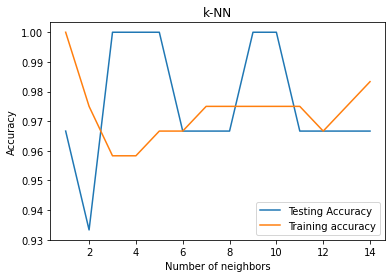

In [ ]:
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

1.0

In [ ]:
knn.predict([[0.8, 1,0.6,3]])

array(['Iris-setosa'], dtype=object)

In [ ]:
knn.predict_proba([[0.8, 1,0.6,3]])

array([[1., 0., 0.]])

Para probar parámetros como en el K-NN la K, se puede también utilizar la siguiente función

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

In [ ]:
print(knn_cv.best_score_,knn_cv.best_params_)

####Validacion Cruzada

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

scoring = ['precision_macro', 'recall_macro','f1_macro']
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
accuracy = cross_val_score(knn, X, y, cv=10)
scores = cross_validate(knn, X,y, scoring=scoring, cv=10)

In [ ]:
sorted(scores.keys())

In [ ]:
print(accuracy.mean())
scores['test_recall_macro'].mean()

Para el resto de los clasificadores use:

MLP: from sklearn.neural_network import MLPClassifier
SVM: from sklearn import svm

In [ ]:
from sklearn.neural_network import MLPClassifier
#Ejemplo de un MLP con dos capas con 5 y 2 neuronas respectivamente
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=10, random_state=1,max_iter=1000)


In [ ]:
mlp.fit(X_train,y_train)

In [ ]:
scoring = ['recall_macro','f1-score','precision']
score_mlp=cross_validate(mlp, X,y, scoring=scoring, cv=10)
accuracy = cross_val_score(mlp, X, y, cv=10)

ValueError: ignored

In [ ]:
print(score_mlp['test_recall_macro'].mean())
print(accuracy.mean())

0.9799999999999999
0.9800000000000001


In [ ]:
param_grid = {'hidden_layer_sizes':np.arange(2,20)}
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=1,max_iter=1000)
mlp_cv= GridSearchCV(mlp,param_grid,cv=10)
mlp_cv.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={

In [ ]:
print(mlp_cv.best_score_,mlp_cv.best_params_)

0.9866666666666667 {'hidden_layer_sizes': 4}


In [ ]:
from sklearn import svm
from sklearn.svm import SVR

In [ ]:

#Diferentes kernels de SVM
svm=svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_lin = SVR(kernel='linear', C=100, gamma='auto')
svm_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)